# Main

In [30]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import networkx as nx
import os

In [31]:
# Leemos el archivo
myFolder = (os.getcwd()) # busca en el directorio actual

#Acá paso los datos a una lista de strings y recorro todos
L=['4','16','32','64','128'];
#L=['4','16'];


#-----cosas para graficar: 
#----A determinar Pc(inf), nu y tau
#Pc vs L ╬
#Pc vs dispersión
#Determinar nu (franco lo hace con log(Pc(L)-Pc(inf))) vs log L
#F(p) vs p
            
#----B determinar D (dimensión fractal)
#log(ns) vs log(s)
#chi^2 vs p

#----C obtener beta a partir de la P(inf)
#log M vs log L, donde M es la masa
#Pinf(p) vs (p-pc)
#log(Pinf(p)) vs log (p-pc)


# Ejercicio 1.

In [32]:
pc_mean = [];
pc_std = [];
pc_L =[]; 
#quiero promediar mis pc para cada L
for i,l in enumerate(L):
#l='4'
    with open (myFolder+'/datos_ej1/datos_ej1_L='+l+'.txt', 'r') as mf: 
        myfile=mf.read()
        datos = [float(i) for i in myfile.split(' ')[:-3] if i.strip()];
        print(len(datos))
        pc_mean= np.mean(datos);
        pc_std=np.std(datos);
        ls=[int(l), pc_mean, pc_std];
       # plt.subplot(5 1 i+1)
        plt.hist(datos,bins=40)
        plt.title('datos_L='+l)
        plt.axvline(pc_mean,color='red')
        plt.show()
    pc_L.append(ls)
    mf.close()


FileNotFoundError: [Errno 2] No such file or directory: '/home/lucia/Desktop/C/TP/computacional/datos_ej1/datos_ej1_L=4.txt'

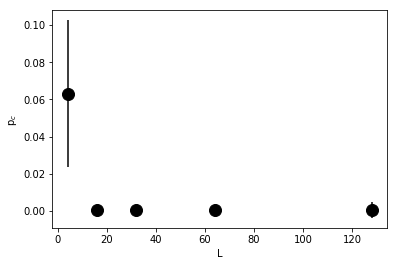

In [13]:
#grafiquemos
name='pcvsL'
plt.figure()
for i in range(0,len(pc_L)):
    plt.plot(pc_L[i][0],pc_L[i][1],'ko', markersize=12)
    plt.errorbar(pc_L[i][0],pc_L[i][1],pc_L[i][2],ecolor='k')
    
plt.xlabel('L')
plt.ylabel('p$_{{c}}$')
#plt.legend()
#plt.title(name)

plt.savefig(name+'_grafico.png')
plt.show()


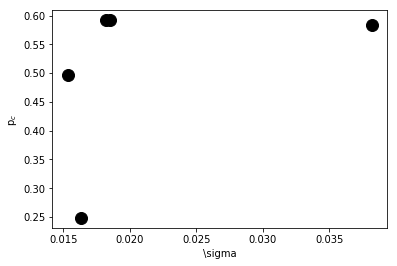

In [23]:
#grafiquemos
name='pcssigma'
plt.figure()
for i in range(0,len(pc_L)):
    plt.plot(pc_L[i][2],pc_L[i][1],'ko', markersize=12)
    
plt.xlabel('\sigma')
plt.ylabel('p$_{{c}}$')
#plt.legend()
#plt.title(name)

plt.savefig(name+'_grafico.png')
plt.show()


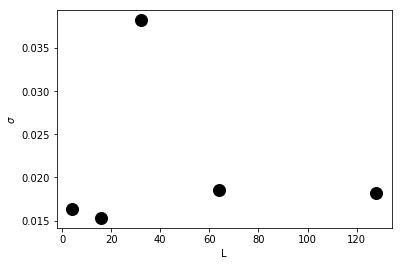

In [24]:
#grafiquemos
name='stdvsL'
plt.figure()
for i in range(0,len(pc_L)):
    plt.plot(pc_L[i][0],pc_L[i][2],'ko', markersize=12)
    
plt.xlabel('L')
plt.ylabel('$\sigma$')
#plt.legend()
#plt.title(name)

plt.savefig(name+'_grafico.png')
plt.show()


In [ ]:
#name='pcvsL'
plt.figure()
for i in range(0,len(pc_L)):
    plt.hist(pc_L[i][1],'ko', markersize=12)
    plt.errorbar(pc_L[i][0],pc_L[i][1],pc_L[i][2],ecolor='k')
   

# Ejercicio 2.

In [26]:
prob_total =[]; #esto sería una lista de listas donde cada elemento es el archivo
fz_perc_total =[];
percola_tot=[];
ns_total = [];

for j,l in enumerate(L):
    with open (myFolder+'/datos_ejercicios/Tablas_L='+l+'.txt', 'r') as myfile: 
        probabilidad_L = [];
        fz_percolante_L =[];
        percola_L = [];
        ns_L = [];
        h=0;
        for myline in myfile: # For each line, stored as myline,
            datos = [i for i in myline.split(' ') if i.strip()];
            largo=len(datos);           #tomo la primera, pero todas tienen misma cantidad de elementos
    
            if largo > 1: #esto lo hice para evitar las filas de los 'x00'
                probabilidad_L.append(float(datos[0]));

                if (str(datos[1]) != 'nan'):
                    fz_percolante_L.append(float(datos[1])); #aca hay que tener cuidado con la probabilidad percolante, xq aparece NaN         

                percola_L.append(float(datos[2]));
                ns_L.append([float (i) for i in datos[3:]]);                 
                h=h+1;
        print (h);
    prob_total.append(probabilidad_L)
    fz_perc_total.append(fz_percolante_L);
    percola_tot.append(percola_L);
    ns_total.append(ns_L);
    myfile.close()


91
91
91
91
91


Método 2

No handles with labels found to put in legend.


IndexError: list index out of range

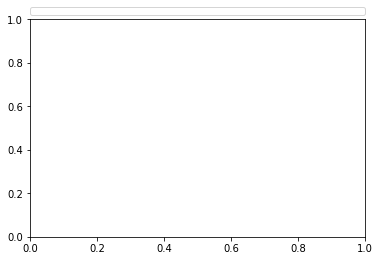

In [29]:
#grafiquemos
#promedio para cada L
#grafiquemos
#promedio para cada L
with open (myFolder+'/datos_ej2/Ej2y3_L='+l+'.txt', 'r') as mf: 
        myfile=mf.read()
        datos = [float(i) for i in myfile.split(' ')[:-3] if i.strip()];
name1='FpvsP'

plt.figure()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
PC=[]
arg_p=[]
error=[]
for i,l in enumerate(L):
    k=0
    while percola_tot[i][k]<0.5:
        k+=1
    pc=(prob_total[i][k-1]+prob_total[i][k])/2
    PC.append(pc)
    arg_p.append(k)
    error.append((prob_total[i][k]-prob_total[i][k-1])/2)
    plt.scatter(prob_total[i],percola_tot[i],s=5,label="L="+l);
    plt.axvline(pc, linestyle='--',linewidth=1) 

#busco en esa lista todas las posiciones posibles para un pc y las promedio
#x=list(range(0,1));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(0.5, linestyle='--') 

plt.xlabel('P')
plt.ylabel('F(P)')
#plt.legend('P_{c}=',pc)
plt.savefig(name1+'_'+l+'.png')    
plt.show()
    
print('los p criticos son:', PC)
print('y sus errores:', error)

In [ ]:
percola_tot[i][k]

Método 3

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


/home/lucia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/home/lucia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log
/home/lucia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


ValueError: x and y must be the same size

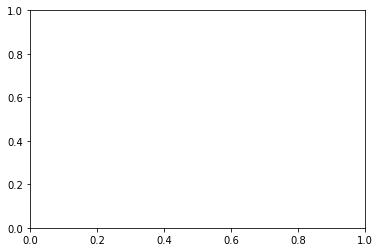

In [40]:
name2='lognsvslogs'
log_ns=[];
log_s=[];
#quiero graficar log(ns) vs log(s)
#for i,l in enumerate(L):
l='16';
i=1;

ns_l=[];
s=[ x/(int(l)*int(l)) for x in list(range(0,len(ns_total[i][1:])))]; #normalicé por L^2
#busco el s más chico distinto de cero
ls=[x for x in s if x !=0];
s_min= min(ls);
ls1=[x for x in s if x<100];
s_max= max(ls1);
#busco su posición
ind_s_min=s.index(s_min);
ind_s_max=s.index(s_max);

#agarro los ns_l desde ahi
ns_l = ns_total[i][ind_s_min:ind_s_max];

#tomo logaritmo para ese rango        
for j in range(0,len(ns_l)):
    print(j)
    log_ns.append(np.log(ns_l[j]));
    log_s.append(np.log(s[j]));


plt.figure()
plt.scatter(log_s,log_ns)
plt.xlabel('$log(S)$')
plt.ylabel('$log(ns)$')
plt.legend(l)
plt.savefig(name2+'.png')
plt.show()


In [98]:
ns_L[2]

[0.006781,
 0.0,
 0.006781,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

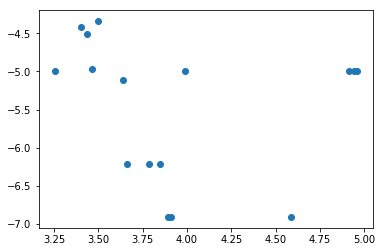

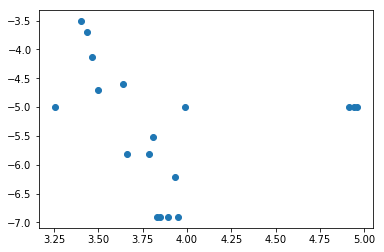

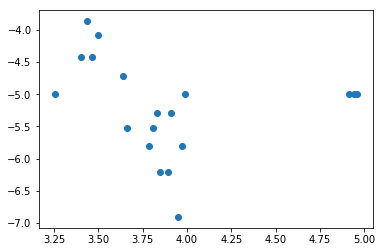

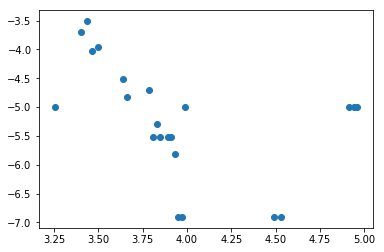

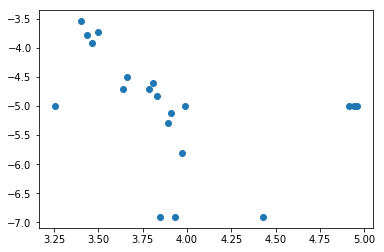

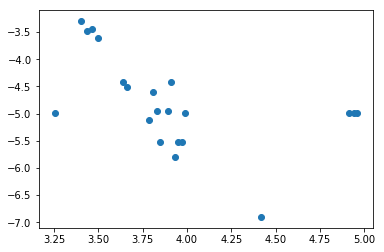

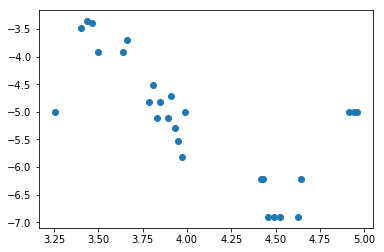

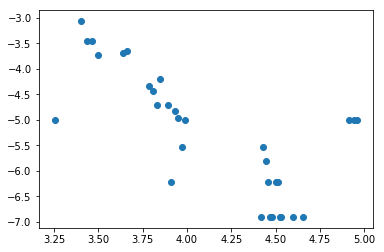

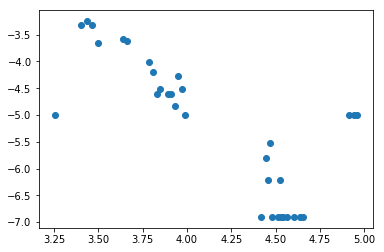

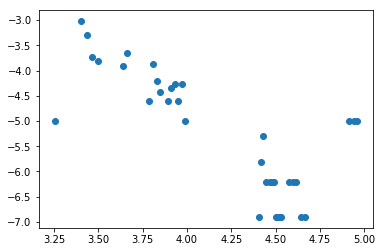

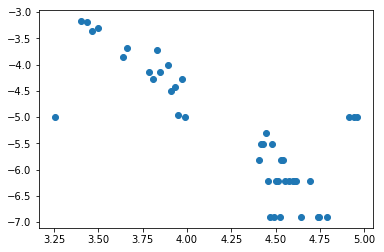

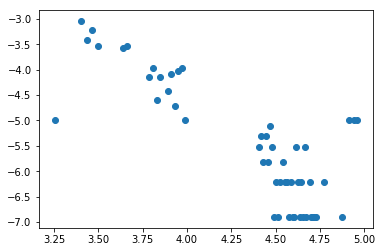

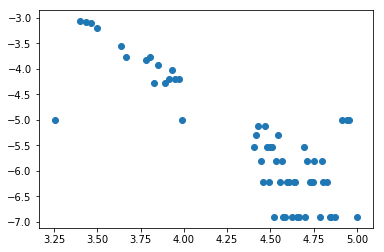

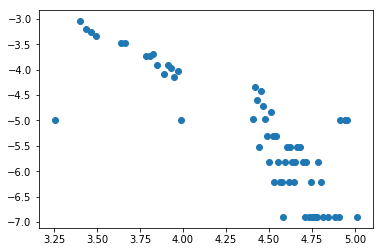

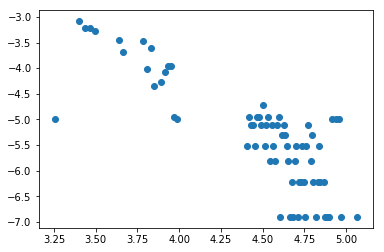

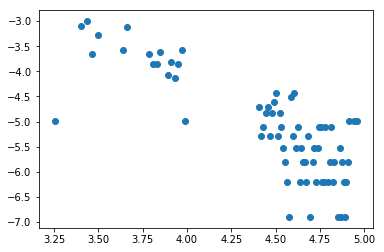

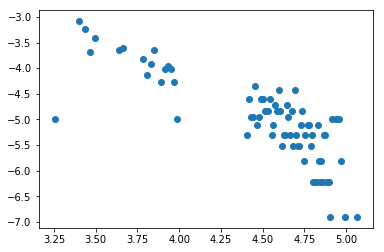

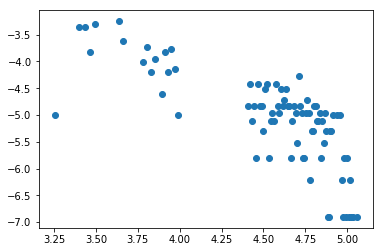

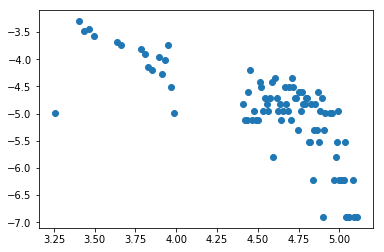

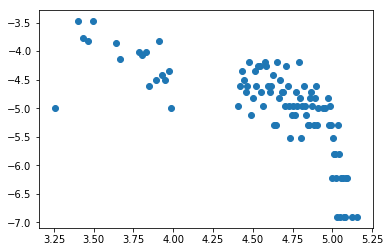

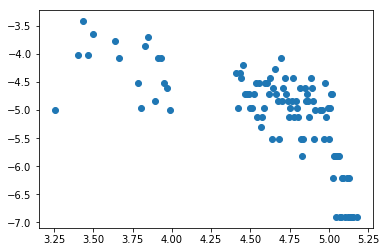

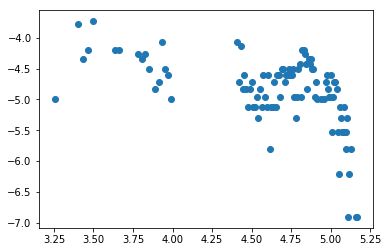

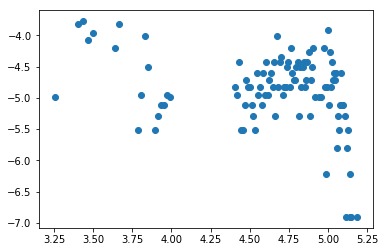

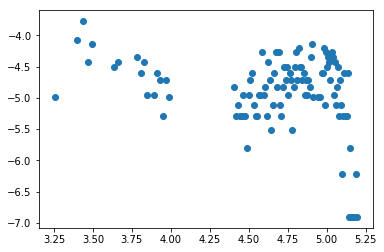

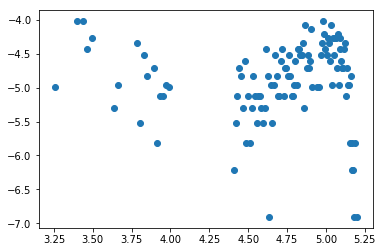

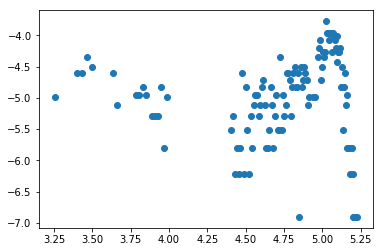

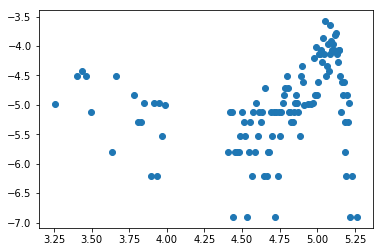

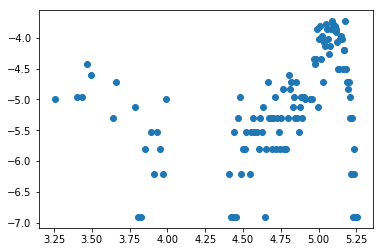

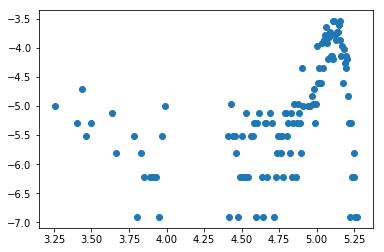

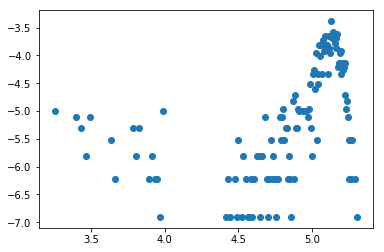

In [41]:
import math
name2='lognsvslogs'
log_s=[math.log(j) for j in range(1,16*16)];
#quiero graficar log(ns) vs log(s)
#for i,l in enumerate(L):
l='16';
Resultados=[]
for i in range(40,70):
    ns=ns_total[1][i]
    log_ns=[]
    log_s=[]
    for j in range(1,len(ns) ):
        if(ns[j]>0):
            log_ns.append(np.log(ns[j]));
            log_s.append(np.log(j));
                
 #   print(log_s,log_s)
    [tau,q]=np.polyfit(log_s,log_ns,1)
    plt.scatter(log_s,log_ns)
    plt.show()
    chi=0
    for j in range(1,len(ns)):
        if(ns[j]>0):
            res=(np.log(ns[j])-(tau*np.log(j)+q))**2
            chi+=res
    Resultados.append([i,tau,q,chi])


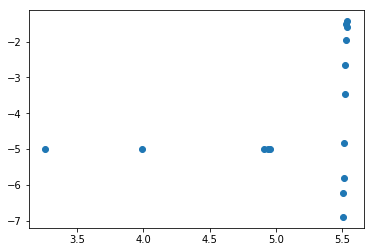

In [63]:
plt.scatter(log_s,log_ns)

IndexError: list index out of range

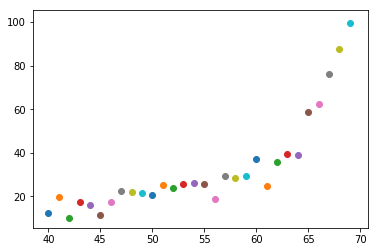

In [94]:
for j in range(0,100):
    #print( Resultados)
    plt.scatter(Resultados[j][0],Resultados[j][3])

In [110]:
L

['4', '16', '32', '64', '128']

9.344894
110.920792
429.353333
1583.117188
6160.344238


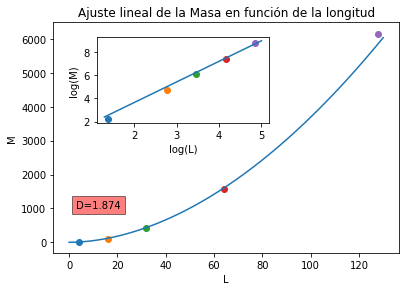

In [170]:


fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.55, 0.4, 0.3]) # inset axes

for i,l in enumerate(L):
    
    pc=PC[i]
    arg=arg_p[i]
    M=fz_perc_total[i][arg]
    print(M)
    axes1.scatter(float(l),M)
    axes2.scatter(np.log(float(l)),np.log(M))

    logL.append(np.log(float(l)))
    logM.append(np.log(M))
[m,b]=np.polyfit(logL,logM,1)
axes1.plot(np.linspace(0,130),np.exp(b)*np.linspace(0,130)**m) 
axes1.text(3,1000,'D='+str(round(m,3)),bbox=dict(facecolor='red', alpha=0.5))
#axes1.title('Distribución')
axes2.set_xlabel("log(L)")
axes2.set_ylabel("log(M)")

axes2.plot(np.linspace(1.3,5),m*np.linspace(1.5,5)+b)
axes1.set_xlabel("L")
axes1.set_ylabel("M")
axes1.set_title('Ajuste lineal de la Masa en función de la longitud')
plt.show()

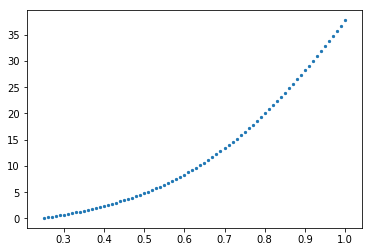

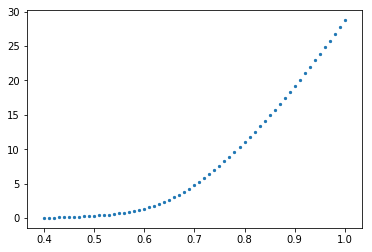

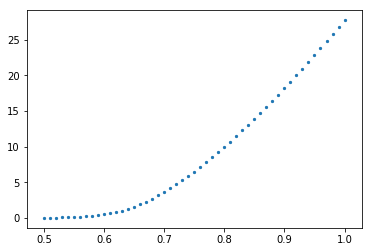

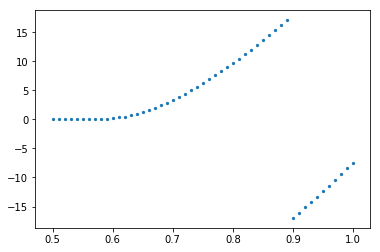

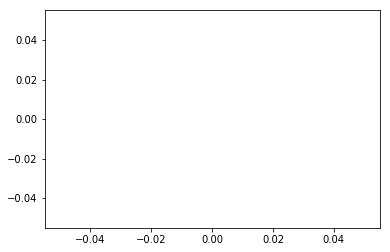

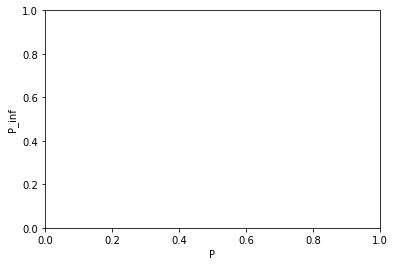

In [24]:
#grafiquemos
#promedio para cada L
with open (myFolder+'/datos_ej1/datos_ej1_L='+l+'.txt', 'r') as mf: 
        myfile=mf.read()
        datos = [float(i) for i in myfile.split(' ')[:-3] if i.strip()];
        print(len(datos))
name1='Cluster_percolante'

plt.figure()
for i,l in enumerate(L):
    p=prob_total[i]
    pinf=[i/(int(l)**2) for i in fz_perc_total[i]]
    plt.scatter(p,pinf,s=5)
    
    plt.show()

 #   plt.leggend(l)
plt.xlabel('P')
plt.ylabel('P_inf')
#plt.legend('P_{c}=',pc)
plt.savefig(name1+'_'+l+'.png') 


In [125]:
m

-0.12591833552829088

### Ejercicio 4 y 5 

In [75]:
tau=2.1
pc=(59-20)
sigma=0.34
for j in range(1,20):
    f=[]
    z=[]
    for i in range(0,56):
        f.append(float(ns_L[i][j])/float(ns_L[pc][j]))
        z.append(j**sigma*(probabilidad_L[i]-probabilidad_L[pc]))
    plt.scatter(z,f, s=5)
plt.scatter(0,1,s=15,c='red')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.show()

ZeroDivisionError: float division by zero

In [ ]:
import math
ns=np.asarray(ns_L)
s=1
x=[]
y=[]
for eses in ns.T[1:15]:
    #print (eses)
    p_max=probabilidad_L[np.argmax(eses)]
   # print(p_max)
    p_graf=(p_max-0.59)
   # print(p_graf)
    plt.scatter(math.log(s),math.log(-p_graf))
    x.append(math.log(s))
    y.append(math.log(-p_graf))
  
    s+=1
valores=np.polyfit(x,y,1)
pol=np.poly1d(valores)
plt.plot(np.linspace(0,2.7),pol(np.linspace(0,2.7)))
plt.xlabel('log(s)')
plt.ylabel('log(pc-p_max)')
plt.text(1.2,-1.2,'tau=0.36')
plt.show()

In [ ]:
import math
ns=np.asarray(ns_L)
s=1
ns_max=[]
p_maxi=[]
for eses in ns.T[1:15]:
    #print (eses)
    p_max=probabilidad_L[np.argmax(eses)]
    print(np.max(eses))
    ns_max.append(np.max(eses))
    p_maxi.append(p_max)
   # print(p_max)
    p_graf=(p_max-0.59)
   # print(p_graf)
    try:
        plt.scatter((s),(-p_graf))
    except:
        print(s,p_graf)
    s+=1
plt.plot(np.linspace(0,14),math.e**valores[1]*(np.linspace(0,14))**valores[0])

In [ ]:
tau=2.1
pc=(59-20)
sigma=-valores[0]
f_max=[]
z_max=[]
for i in range(1,14):
    f_max.append(float(ns_max[i-1])/float(ns_L[pc][i]))
    z_max.append(i**sigma*(p_maxi[i-1]-probabilidad_L[pc]))
   

In [ ]:
tau=2.1
pc=(59-20)
sigma=-valores[0]
for j in [7,4]:
    f=[]
    z=[]
    for i in range(0,56):
        f.append(float(ns_L[i][j])/float(ns_L[pc][j]))
        z.append(j**sigma*(probabilidad_L[i]-probabilidad_L[pc]))
    plt.plot(z,f,label=('s='+str(j)))
    plt.scatter(z_max[j-1],f_max[j-1],s=10,c='blue')

plt.legend()
plt.scatter(0,1,s=15,c='red')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.show()

In [76]:
for j in range(0,5):
    ns=ns_total[j]
    i=0
    momentos=[]
    
    for tira in ns:
        p=prob_total[i][j]
        i+=1
        m2=0
        for k in range(0,len(tira)):
            m2=m2+tira[k]*(k**2);
        momentos.append(m2)
    plt.plot(prob_total_[i],momentos)    

IndexError: list index out of range